# EDA based on kaggle dataset (ice cream analysis)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
flavor = pd.read_csv('icecream_flavors.csv')
sales = pd.read_csv('icecream_sales.csv')
temperature = pd.read_csv('icecream_temp.csv')
week = pd.read_csv('sales_we.csv')

In [44]:
all_data = [flavor, sales, temperature, week]
for data in all_data:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        208 non-null    int64 
 1   units sold  208 non-null    int64 
 2   flavor      208 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   sales   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    int64  
 1   sales        365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB
<class 'pandas.core.

In [20]:
print('flavor duplicate val :', flavor.duplicated().value_counts())
print('')
print('sales duplicate val :', sales.duplicated().value_counts())
print('')
print('temperature duplicate val :', temperature.duplicated().value_counts())
print('')
print('sales week duplicate val :', week.duplicated().value_counts())

flavor duplicate val : False    208
dtype: int64

sales duplicate val : False    365
dtype: int64

temperature duplicate val : False    364
True       1
dtype: int64

sales week duplicate val : False    365
dtype: int64


from the info above, we can see that this dataset have no null values and have 1 duplicate value in temperature dataset, so we should drop the duplicate value

In [21]:
#drop the duplicate value in temperature dataset
temperature.drop_duplicates(inplace=True)
temperature.shape

(364, 2)

after the data clean from null value and duplicate value, now we will describe the data

In [46]:
#describe numerical
for num in all_data:
    print(num.describe())

             week  units sold
count  208.000000  208.000000
mean    26.500000   10.091346
std     15.044539    5.666779
min      1.000000    1.000000
25%     13.750000    5.000000
50%     26.500000   10.000000
75%     39.250000   15.000000
max     52.000000   20.000000
            sales
count  365.000000
mean   104.499507
std     26.942417
min     58.660000
25%     85.270000
50%    102.070000
75%    123.040000
max    184.110000
       temperature       sales
count   365.000000  365.000000
mean     71.980822   52.103616
std      13.258510   15.989004
min      39.000000   11.880000
25%      63.000000   40.650000
50%      73.000000   53.620000
75%      82.000000   63.630000
max     101.000000   89.290000
            sales
count  365.000000
mean   104.499507
std     26.942417
min     58.660000
25%     85.270000
50%    102.070000
75%    123.040000
max    184.110000


In [47]:
#describe categorical
oncat = [flavor, sales, week]
for cat in oncat:
    print(cat.describe(include='O'))

       flavor
count     208
unique      4
top     lemon
freq       52
              date
count          365
unique         365
top     12/18/2019
freq             1
              date     days week_end
count          365      365      365
unique         365        7        2
top     12/18/2019  Tuesday       No
freq             1       53      261


### Flavor

In [23]:
flavor.columns

Index(['week', 'units sold', 'flavor'], dtype='object')

In [13]:
flavor.flavor.value_counts()

chocolate     52
lemon         52
strawberry    52
vanilla       52
Name: flavor, dtype: int64

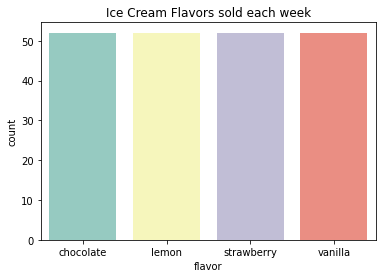

In [6]:
sns.countplot(x = 'flavor', data = flavor, palette='Set3')
plt.title('Ice Cream Flavors sold each week')
plt.show()

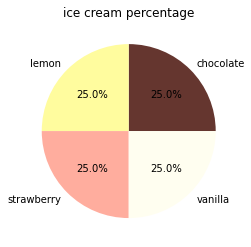

In [19]:
cl = ['#65362f', '#fffc9e', '#ffad9e', '#fffef0']
flavorc = flavor['flavor'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(flavorc, autopct='%1.1f%%', labels=flavorc.index, colors=cl);
plt.title('ice cream percentage');

### Temperature

In [25]:
temperature.columns

Index(['temperature', 'sales'], dtype='object')

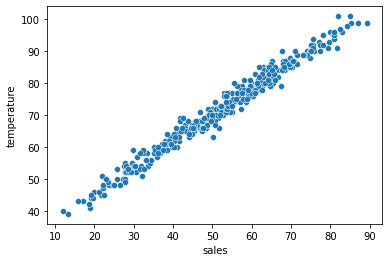

In [28]:
sns.scatterplot(x=temperature['sales'], y=temperature['temperature']);

### Week

In [29]:
week.columns

Index(['date', 'sales', 'days', 'week_end'], dtype='object')

In [49]:
week.days.value_counts()

Tuesday      53
Wednesday    52
Sunday       52
Monday       52
Thursday     52
Friday       52
Saturday     52
Name: days, dtype: int64

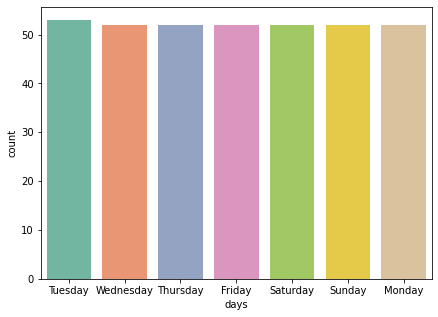

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x=week['days'], palette='Set2');

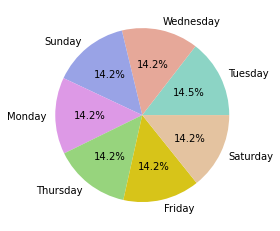

In [54]:
pl = ['#8cd4c5', '#e6a899', '#99a3e6', '#dd99e6', '#97d47d', '#d7c419', '#e4c3a0']
days = week['days'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(days, autopct='%1.1f%%', labels=days.index, colors=pl);

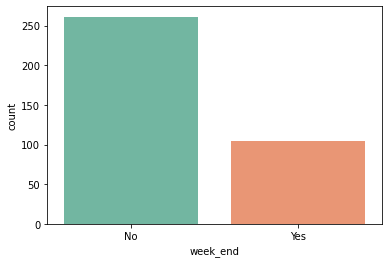

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x=week['week_end'], palette='Set2');

## Insight
Flavor = The number of sales each week is the same for all the flavor variants, it can be concluded that the flavor variant has no effect on the customer or the customer likes all the variants so that there is no difference in sales. 

Temperature = Temperature has a very significant effect on sales because when the weather gets hotter, more consumers buy ice cream.

Week = The average number of sales in that year is almost the same (52) and consumers mostly buy ice cream on weekdays rather than weekends.